# 05-06-2024

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
visa_df=pd.read_csv(r"C:\Users\keert\Documents\DATA SCIENCE\nareshit\datafiles\Visadataset - Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Box plot**

- Box plot is used to detect outliers
- Box plot ha min q1 q2 q3 and max value
- Inside box plot red line represents median which 50 percentile data
  
**Outlier**
- very very huge observation
- very very small observation
- which pull the data in any side of the distributuin
- Mild outliers
   - q1-1.5*IQR and q3+1.5IQR
     
- strong Outliers
   - q1-3IQR and q3+3IQR
     
- IQR : Inter quartile range
   - IQR=Q3-Q1
 - q1: 25p
 - q2: 50p
 - q3:75p

In [ ]:
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR

                   |-----:-----|
   o      |--------|     :     |--------|    o  o
                   |-----:-----|
 flier             <----------->            fliers
                        IQR

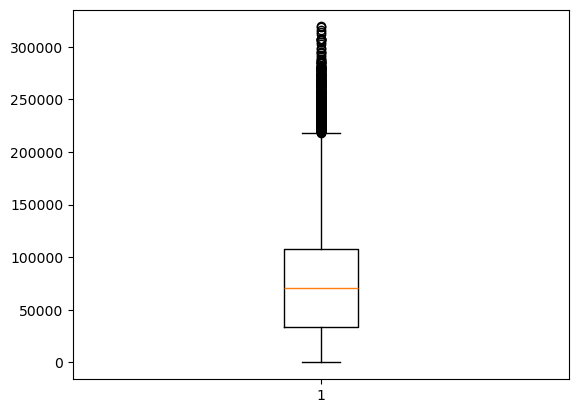

In [6]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

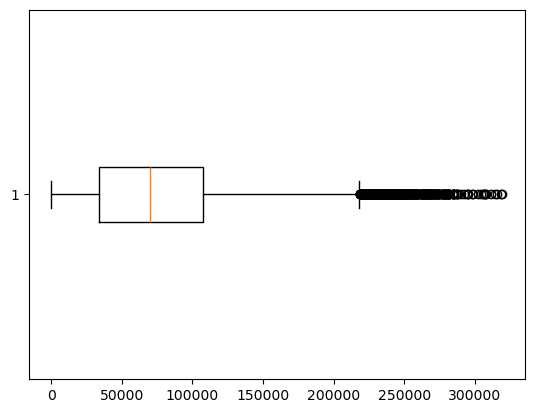

In [7]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

<Axes: >

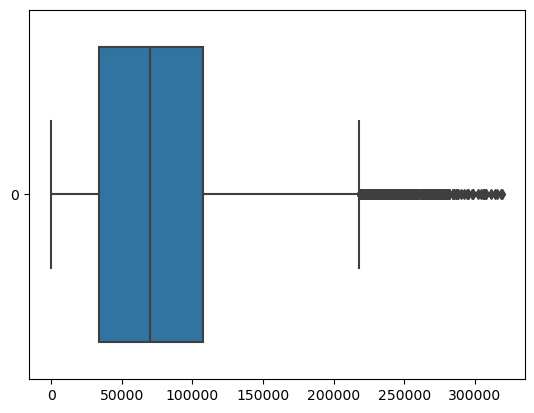

In [8]:
sns.boxplot(visa_df['prevailing_wage'],
           orient='h')

<Axes: >

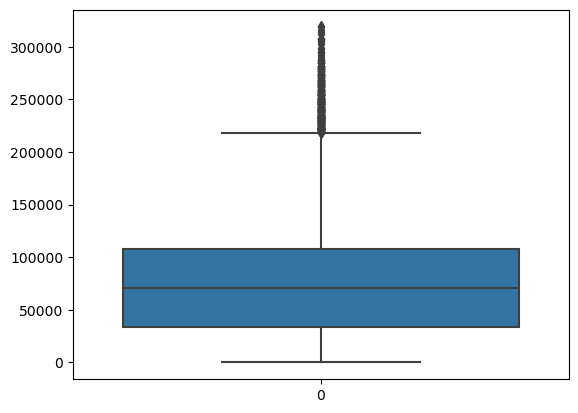

In [11]:
sns.boxplot(visa_df['prevailing_wage'],orient=False)


<Axes: >

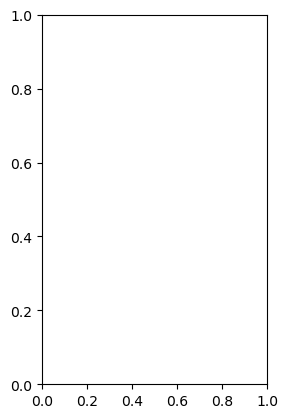

In [12]:
plt.subplot(1,2,1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b8699c8610>,
 'caps': [<matplotlib.lines.Line2D at 0x1b8699c9990>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b8699a8590>],
 'medians': [<matplotlib.lines.Line2D at 0x1b8699cac50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b8699cb510>],
 'means': []}

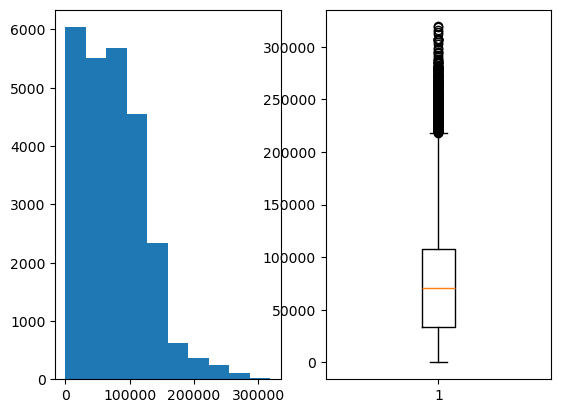

In [15]:
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])

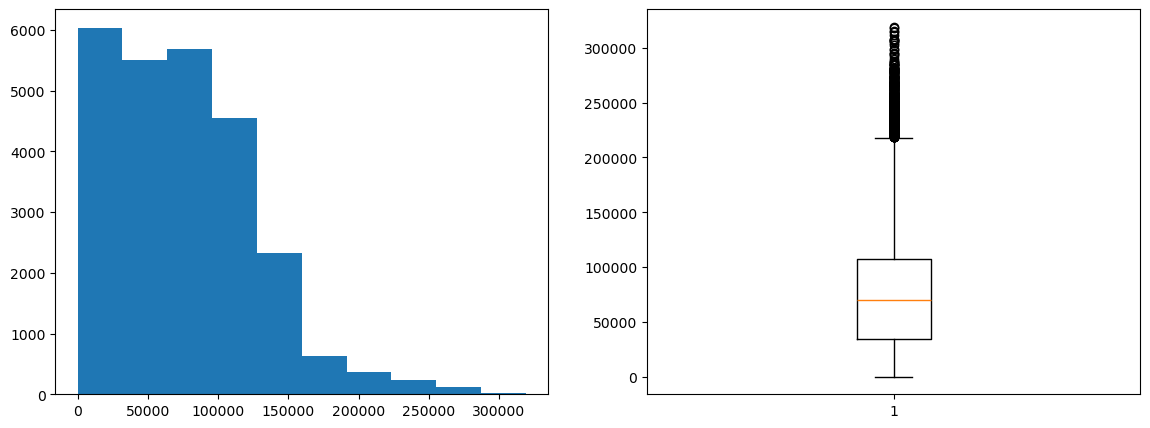

In [18]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

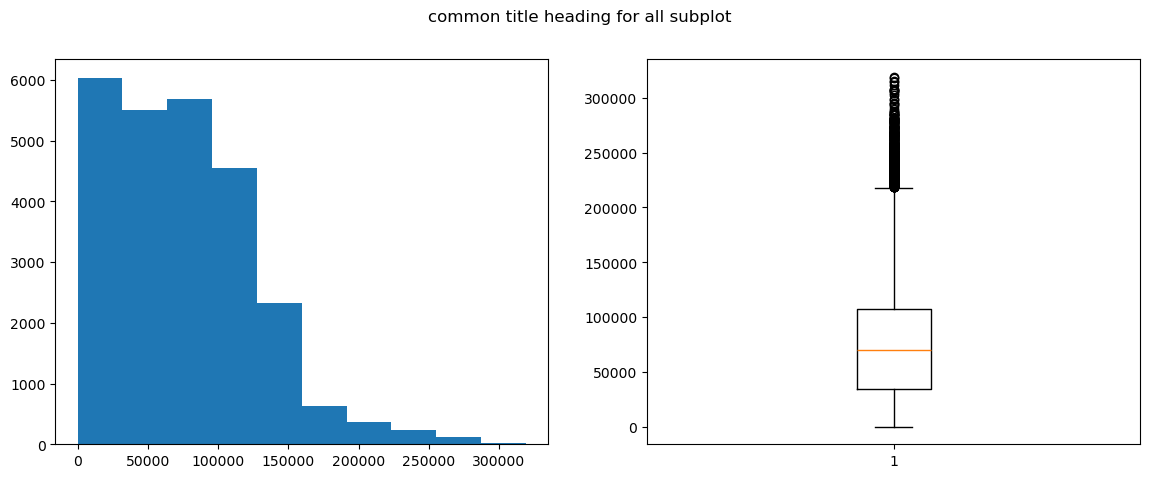

In [9]:
plt.figure(figsize=(14,5))
plt.suptitle('common title heading for all subplot')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the Outliers**
- Outliers are available less than q1-1.5*IQR
- Outliers are available greater than q3+1.5*IQR

- Step1:
   - Calculate Q1: 25p
   - Calculate Q3: 75p
   - Calculate IQR: Q3-Q1

- Step2:
    - LB= Q1-1.5*IQR
    - UB= Q3+1.5*IQR

- Step3:
    - con1=visa_df['prevailing_wage']<LB
    - con2=visa_df['prevailing_wage']>UB
    - apply Or operator and get the outliers data

**Outliers data**

In [15]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1 | con2]
len(outliers_data)

427

**Non Outliers data**

In [14]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1 | con2]
len(non_outliers_data)

25480

**Histogram and boxplot for non outliers data**

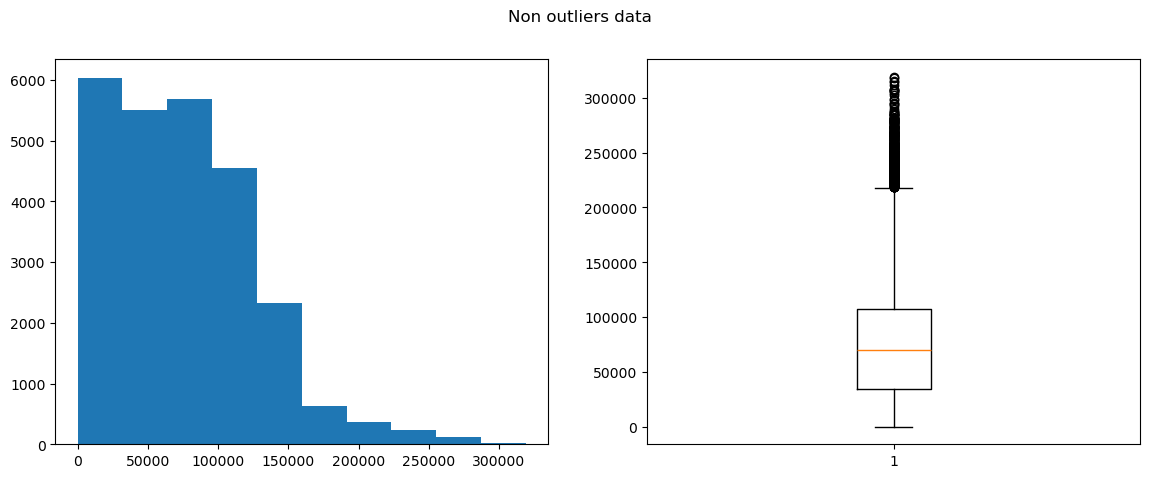

In [21]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outliers data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage']) # 25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage']) # 25053
plt.show()

**Comparing total data with non outliers data**

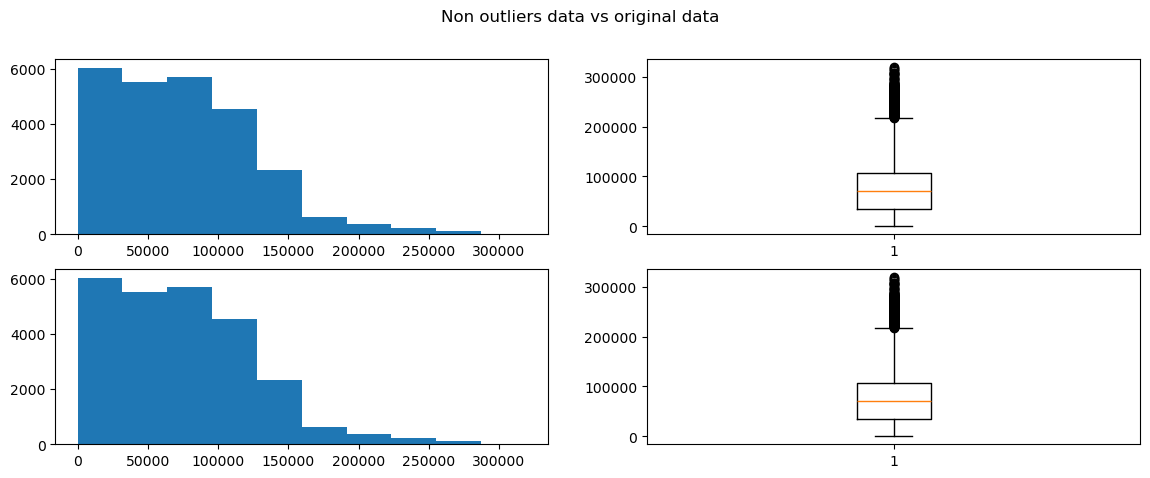

In [22]:
plt.figure(figsize=(14,5))  # 14 units in x axis  5 units in y axis

plt.suptitle('Non outliers data vs original data')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage']) # 25053
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage']) # 25053


plt.subplot(2,2,3).hist(visa_df['prevailing_wage']) # 25480
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage']) # 25480
plt.show()

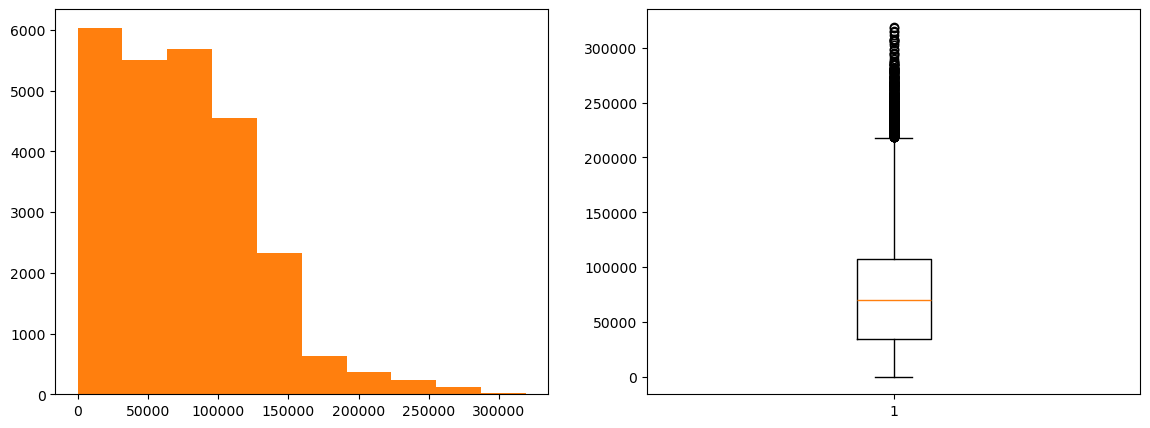

In [24]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage']) # 25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage']) # 25053
plt.show()

**How to deal the outliers**

**Method-1: Drop the outliers**
    
  - Drop the outliers is not a good idea
  - when you drop the outliers , data will loss
  - For example here we are droping 427 rows
  - x% of 25480=427
  - it is 1.7% data , here it is fine we can drop the outlier
      
**Method-2: Fill with median value**
    
  - we already know that the outliers does not affect the median
  - so we can fill outliers by median
    
**Method-3: Cap the values with Q1 and Q3**

  - all lesser tha lower bound values , we can replace with q1 or Lb
  - all greater than upper bound values , we can replace with q3 or UB

**Fill with median** 

- create a empty list 
- calculate median value : visa_df['prevailing_wage'].median
- iterate through visa_df['prevailing_wage'].values
- if each value i.e, ub then append with mecian values
- else append with i value

In [29]:
for i in visa_df['prevailing_wage'].values:
    if i<lb or i>ub:

SyntaxError: incomplete input (3465648946.py, line 2)

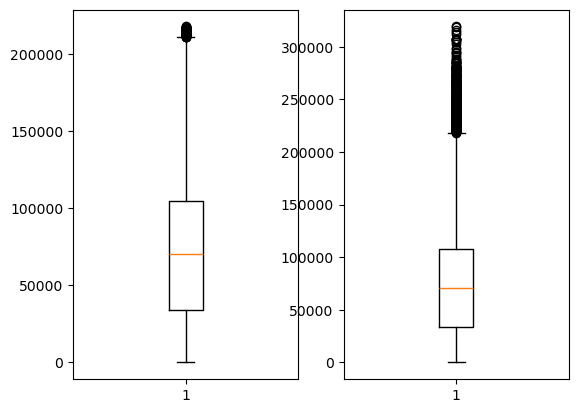

In [30]:
l1= []
median = visa_df['prevailing_wage'].median()

Q1 = np.percentile(visa_df['prevailing_wage'], 25)
Q3 = np.percentile(visa_df['prevailing_wage'], 75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR


for value in visa_df['prevailing_wage'].values:
    if value  < LB or value > UB:
        l1.append(median)
    else:
        l1.append(value)
        
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = l1
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

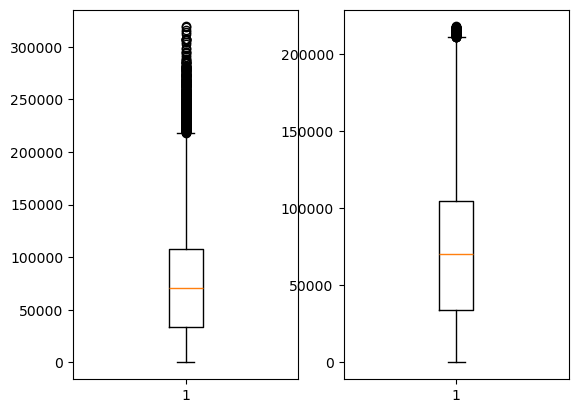

In [31]:
l=[]
median = visa_df['prevailing_wage'].median()
for i in (visa_df['prevailing_wage'].values):
    if i <LB or i>UB:
        l.append(median)
    else:
        l.append(i)
        
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = l
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()

# Visa df: original data
# Visa df copy: medain values in place of outliers

**np.where**

- np.where will use for binary condition
- it has 3 arguments
   - condition
   - value if condition is True
   - value if condition is False

In [33]:
d={"sub":["DS","ML","CS"],
          "Marks":[100,150,20]}
data=pd.DataFrame(d)

#marks column replace with 1 when value >100
# else same value 
# Marks Marks
# 100   100
# 150   1
# 20    20

In [34]:
con=data['Marks']>100
l=np.where(con,1,data['Marks'])
# if condition True then replace with :1
# if ondition false then replace with : data['Marks']
l

array([100,   1,  20], dtype=int64)

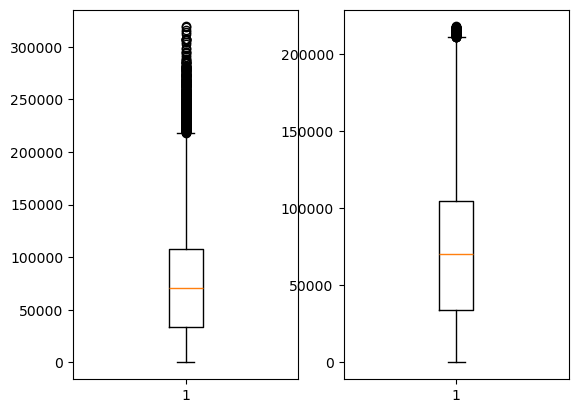

In [35]:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
con=con1 | con2

median=visa_df['prevailing_wage'].median()

new_data=np.where(con,
                  median,
                  visa_df['prevailing_wage'])

visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = new_data
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()